<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Modelos de clasificación</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Modelos de clasificación

- Así como los modelos de regresión aprenden a predecir valores, los modelos de clasificación son aquellos enfocados en la **predicción de clases**.
- Algunos modelos de clasificación:
    * Decision Trees
    * Random Forest 
    * KNN
    * Regresión Logística
    * Naive Bayes
    * Redes Neuronales
    * Etc.
- Nota como muchos de los modelos ya aprendidos para regresión también pueden ser utilizados para clasificación (con leves modificaciones)
- A diferencia de los modelos de regresión, en los modelos de clasificación es importante tener en cuenta la cantidad de datos para cada clase. Tener exceso de una clase respecto a otra puede generar graves problemas en el proceso de aprendizaje (aprender mucho mejor de aquella clase que existan más datos).

# Tipos de modelos de clasificación

Los modelos de clasificación pueden ser de tipo
- **Clasificación binaria**: El modelo solo debe predecir entre dos posibles clases
- **Clasificación multiclase**: El modelo debe predecir entre múltiples posibles clases.

# Árboles de decisión para clasificación

- A diferencia de los árboles de decisión para problemas de regresión, donde la función de costo dependía directamente del *MSE*, al utilizarlo en problemas de clasificación, la función de costo dependerá de una función de *impureza* llamada **Impureza Gini**.
- En este caso se opera dividiendo el dataset de entrenamiento en dos grupos en base a una característica $k$ y un umbral $t_k$ tales que $k$ y $t_k$ produzcan el menor grado de impureza.
- Cálculo de la impureza de Gini:

$$ G_i = 1 - \sum_{k=1}^n p_{i,k}^2$$

$p_{i,k}$ es la razón entre instancias de clase $k$ vs instancias del nodo $i$ (revisar *value*)

In [1]:
# Ejemplo
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2: ] # Solo columnas de largo y ancho del pétalo
y = iris.target

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

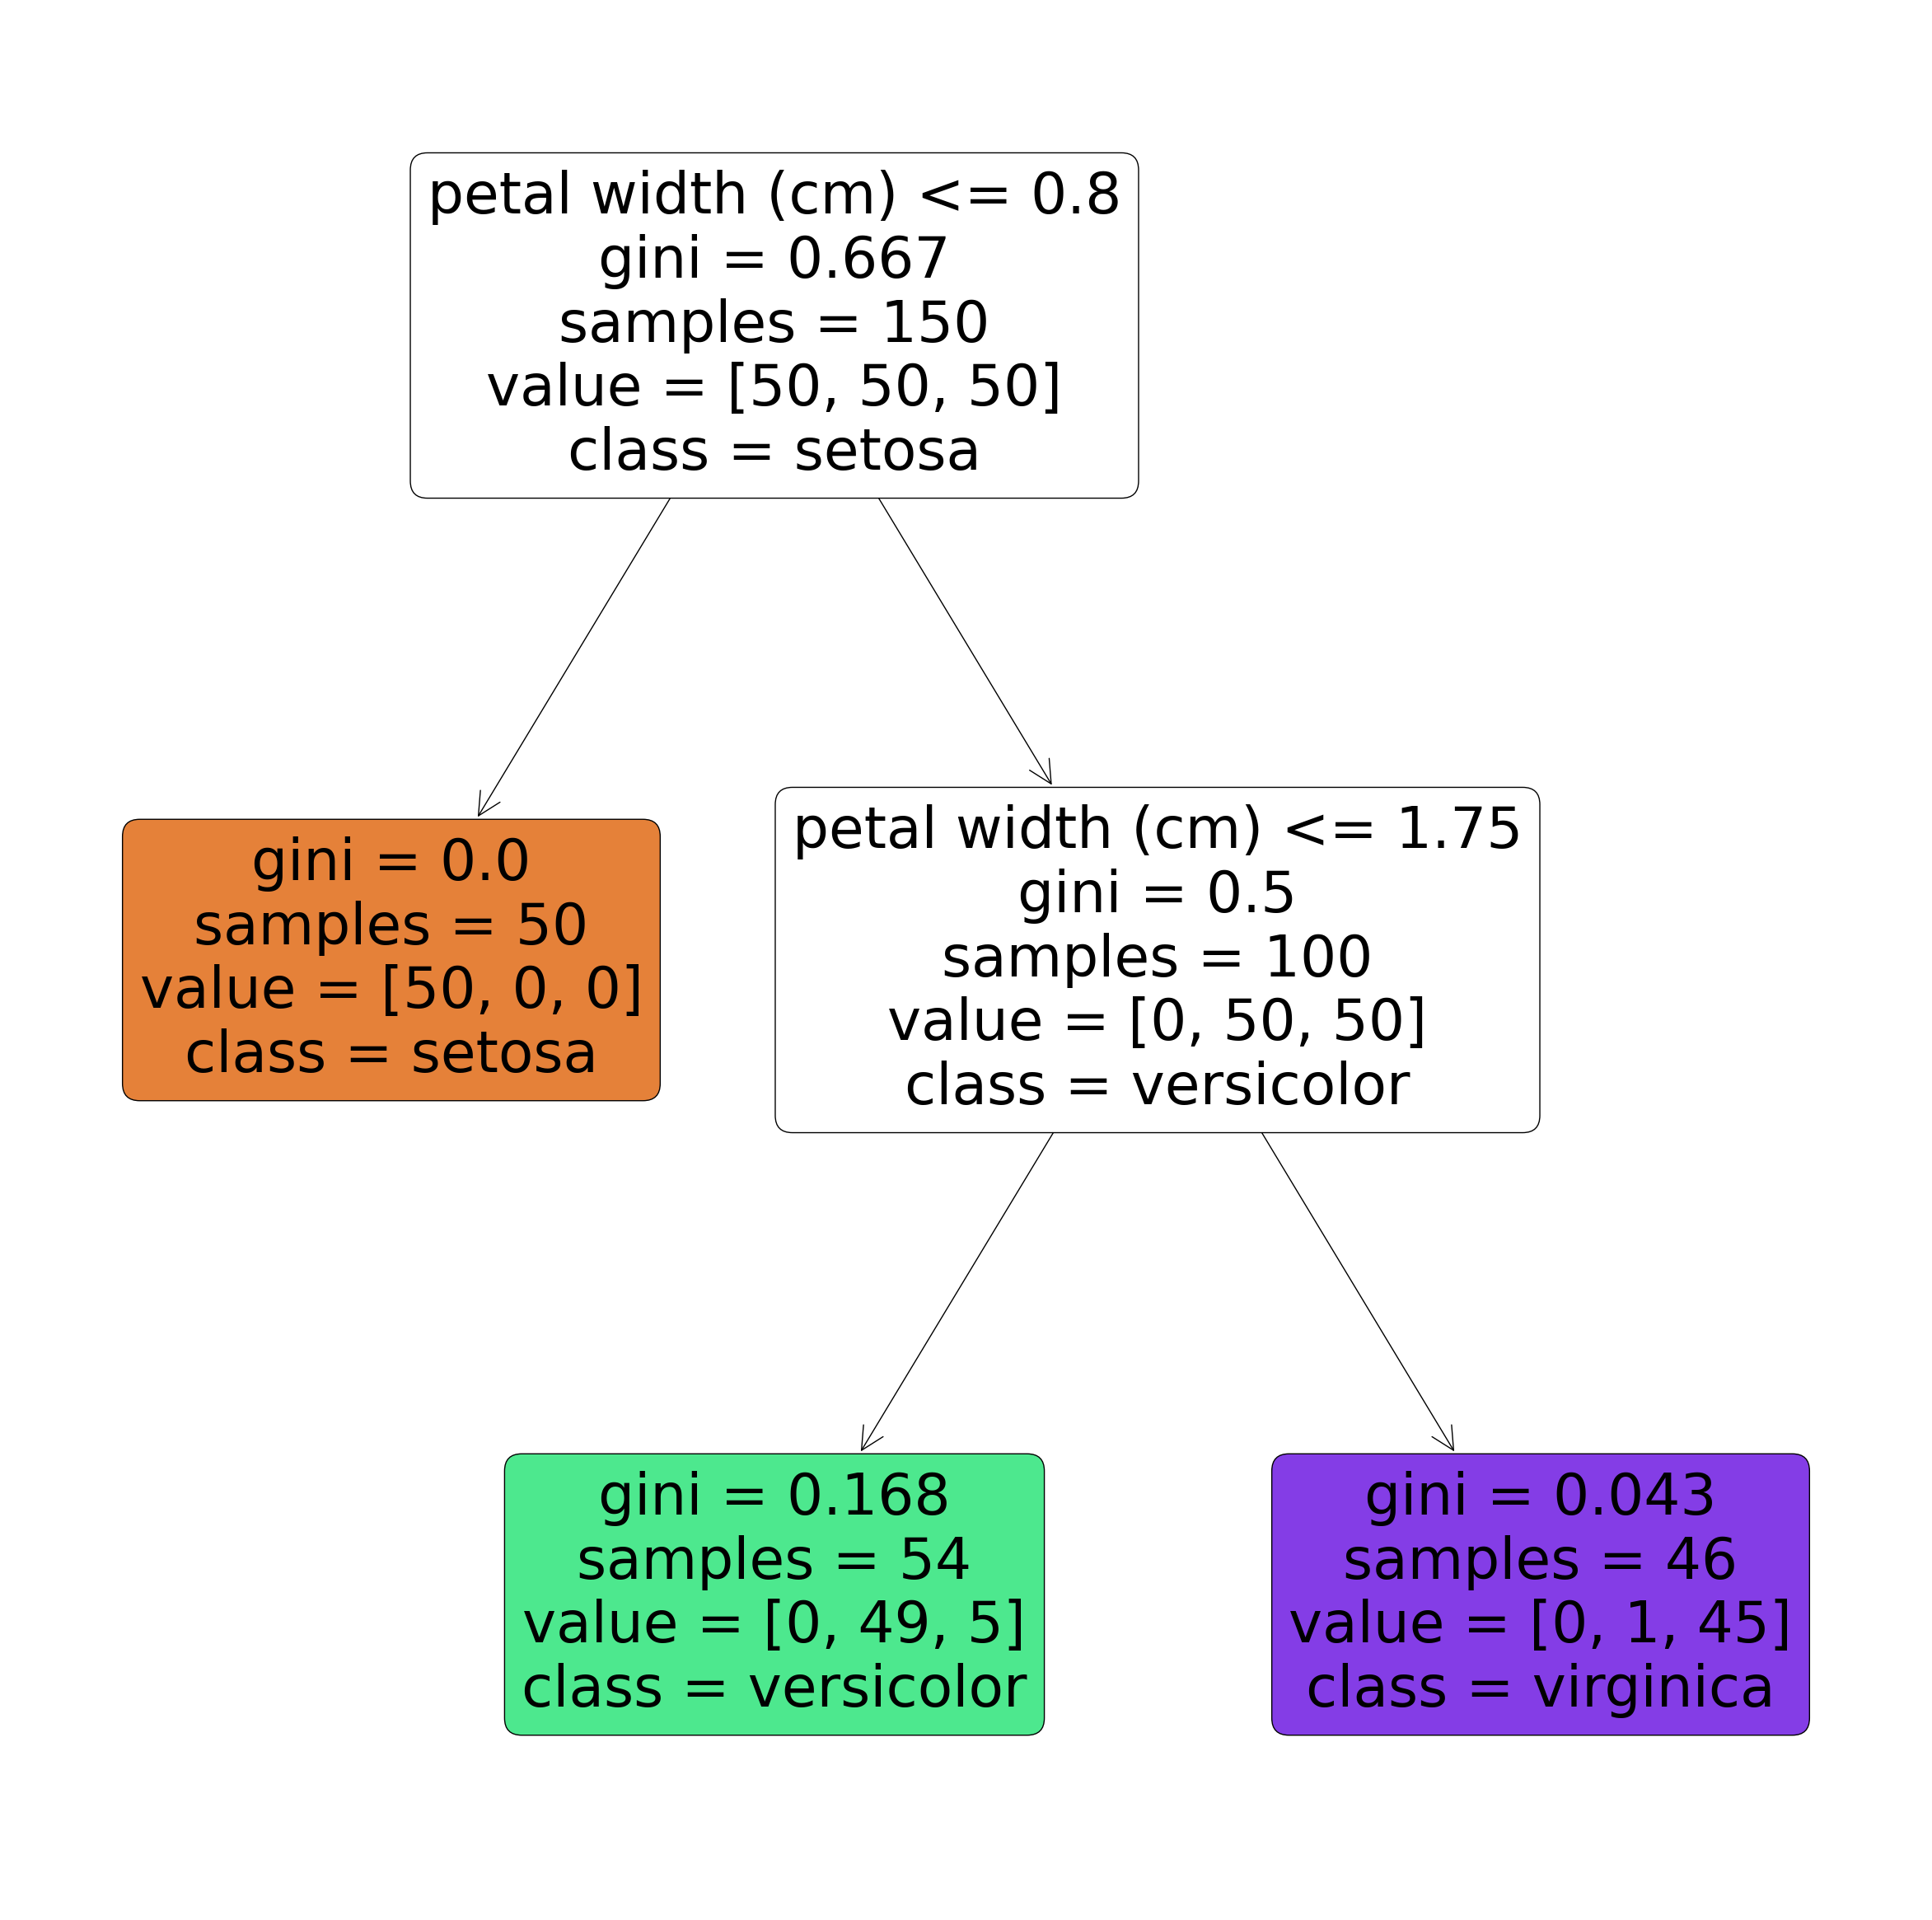

In [3]:
# Visualizando árbol de decisión
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
tree.plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Cálculo de Gini para clase versicolor

$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2 = 1 - \left(\left(\frac{0}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2 \right) \approx 0.168$$

- A partir del árbol de decisión es posible obtener la probabilidad de que una nueva instancia pertenezca a una cierta clase.
- La nueva instancia pertenecerá a aquella clase con mayor probabilidad

In [4]:
# Nueva instancia (es un dato de prueba)
x_new = [[5, 1.5]]
# Probabilidades por cada clase
print(tree_clf.predict_proba(x_new))
# Clase predicha
print("Esta instancia pertenece a la clase",tree_clf.predict(x_new))

[[0.         0.90740741 0.09259259]]
Esta instancia pertenece a la clase [1]


# KNN - K Nearest Neighbors (K Vecinos más próximos)

- Modelo basado en instancias y uno de los algoritmos de ML más simples de implementar.
- Permite clasificación y regresión de datos.
- Una nueva instancia se asigna como perteneciente a la clase con las k instancias más cercanas a esta.

<img src="images/KnnClassification.png" alt="" width="300px" align="center"/>
Fuente imagen: https://commons.wikimedia.org/wiki/File:KnnClassification.svg

# KNN con Scikit-Learn

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target']) # Separación de las características
y = df['target'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # Ojo: escalamiento de test se hace en base al train

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
Accuracy: 1.0


# Regresión Logística (Logistic Regression)

- **Contexto**: Intentemos utilizar la regresión lineal como un clasificador

In [2]:
from sklearn.datasets import load_breast_cancer

# Set de datos sobre datos de cancer de mamas en Wisconsin 
# Objetivo: clasificación de tumores benignos y malignos
br_cancer = load_breast_cancer()
print('Características', br_cancer.feature_names)
# Originalmente 0 es maligno y 1 es benigno. Lo invertiremos
print('Target', br_cancer.target_names[::-1]) 

Características ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target ['benign' 'malignant']


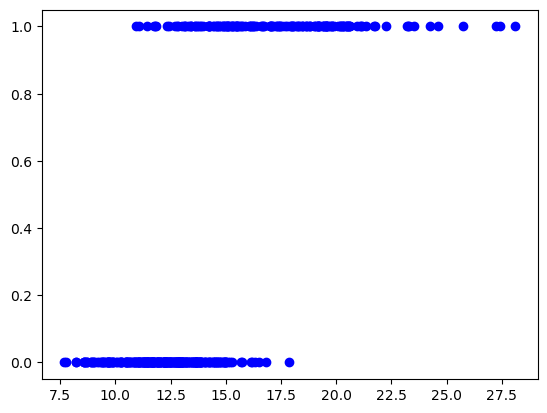

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = br_cancer.data[:, 0].reshape(-1,1) # mean_radius
y = 1 - br_cancer.target # Nuevamente inversión maligno/benigno 0/1
# Luego de inversión: benigno 0 y maligno 1

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

plt.plot(X_train, y_train,'bo')
plt.show()

Intercepto: -1.0154354797965857
Coeficientes: [0.09823629]


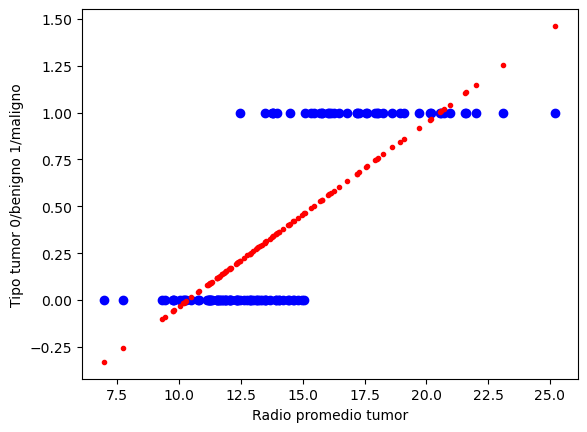

In [4]:
# Ajustando modelo de regresión lineal

from sklearn.linear_model import LinearRegression

# Entrenamiento regresor lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercepto:', lin_reg.intercept_, )
print('Coeficientes:', lin_reg.coef_ )

# Gráfico datos reales test vs predicciones de test
plt.plot(X_test, y_test,'bo')
plt.plot(X_test, lin_reg.predict(X_test),'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

- Regresión lineal simplemente hace regresión sobre los datos. ¿Cómo podemos clasificar usando este modelo? 
    - R: *umbral*
    
\begin{align}
    \hat{y}=\left\{
    \begin{array}{ll}
      0, & \mbox{si $\hat{p} <0.5$}.\\
      1, & \mbox{si $\hat{p} \geq0.5$}.
    \end{array}
  \right.
\end{align}

donde $\hat{p}$ es el valor predicho por el regresor lineal e $\hat{y}$ es la clase predicha. En este ejemplo, escogeremos el umbral en 0.5 para clasificación
- Problema: ¿Cómo interpretamos los valores de la regresión lineal? por ejemplo  $\hat{p}=-0.25$
- La regresión logística hace la regresión lineal **interpretable**

### Regresión logística

- A pesar de hacer regresión, se utiliza normalmente para clasificación
- Permite darle una interpretación a los valores obtenidos por la regresión: Probabilidad de pertenecer a cierta clase
- Ecuación de función logística

$$ \sigma(t) = \frac{1}{1+e^{-t}} = \frac{1}{1+\frac{1}{e^t}}$$

<img src='images/logisticFunction.png' width=600>

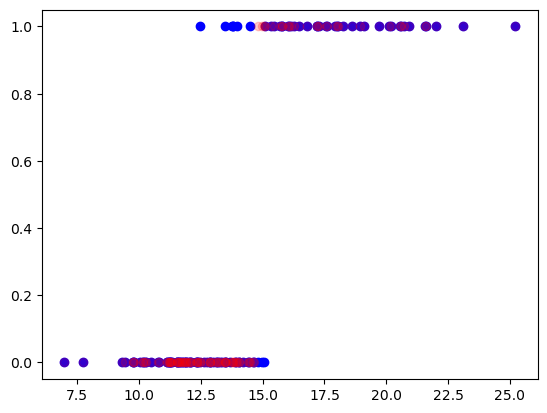

In [5]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Gráfico datos reales test vs predicciones de test
plt.plot(X_test, y_test,'bo')
plt.plot(X_test, log_reg.predict(X_test), 'ro', alpha=0.2)

In [6]:
import numpy as np
print("Predicción de regresión logística", log_reg.predict(X_test))
print("Valor target real", y_test)
print(log_reg.predict_proba(X_test)*100)
print(np.sum(log_reg.predict_proba(X_test),axis=1))

Predicción de regresión logística [0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
Valor target real [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
[[9.00915621e+01 9.90843787e+00]
 [1.92626638e+00 9.80737336e+01]
 [3.47751832e+01 6.52248168e+01]
 [9.06687456e+01 9.33125440e+00]
 [9.56464086e+01 4.35359140e+00]
 [4.05054007e-01 9.95949460e+01]
 [1.06639827e-01 9.98933602e+01]
 [6.71994939e+00 9.32800506e+01]
 [7.99334444e+01 2.00665556e+01]
 [7.00758470e+01 2.99241530e+01]
 [8.18387479e+01 1.81612521e+01]
 [1.32260819e+01 8.67739181e+01]
 [4.59063864e+01 5.40936136e+01]
 [1.99754002e+01 8.00245998e+01]
 [9.11392770e+01 8.8

# Recordatorio: Tipos de errores

- **Errores de Tipo 1 - Falso Positivo**: Clasificamos un elemento como *perteneciente* (positivo) a la clase **incorrectamente** (falso)

<img src="images/un5.jpeg" alt="" width="300px" align="center"/>

- **Errores de Tipo 2 - Falso Negativo**: Clasificamos un elemento como *no perteneciente* (negativo) a la clase **incorrectamente** (falso)

<img src="images/noUn5.jpeg" alt="" width="300px" align="center"/>

# Recordatorio: Matriz de confusión

- **Matriz de confusión**: Permite contar la cantidad de veces que instancias de la clase A son clasificadas como clase B
<img src="images/matrizConfusion.png" alt="" width="700px" align="center"/>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow", O'Reilly

# Recordatorio: métricas

- **True Positive Rate** (sensibilidad)

$$ TPR = \frac{TP}{TP + FN}$$

- **False Positive Rate** 
$$ FPR = \frac{FP}{FP + TN} $$

# Curvas ROC

- La curva **Característica Operativa del Receptor** (Receiver Operative Characteristic/ROC) muestra la relación entre el True Positive Rate (sensibilidad) y el False Positive Rate. (Visualización [aquí](http://www.navan.name/roc/))
- El **Área Bajo la Curva** (Area Under Curve/AUC) se utiliza como un valor de medida que proyecta lo visualizado en la curva ROC. Un clasificador perfecto tendrá valor $AUC=1$, mientras que para un clasificador aleatorio, $AUC=0.5$. En scikit-learn, para que se pueda calcular el auc_score de un modelo, este **debe** tener el método *predict_proba* (Ej. El modelo Ridge, no posee este método, por lo que no sería posible calcular el auc_score de este).

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve

# Set de datos de flores con solo 2 clases en vez de 3
df = pd.read_csv('data/modifiedIris2Classes.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [10]:
df['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
# Dividir en X e y
X = df.drop(columns = 'target')
y = df['target']
# Crea una instancia del modelo
logreg = LogisticRegression()
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# Model está aprendiendo la relación entre X e y
logreg.fit(X_train, y_train)

LogisticRegression()

/home/polivares/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


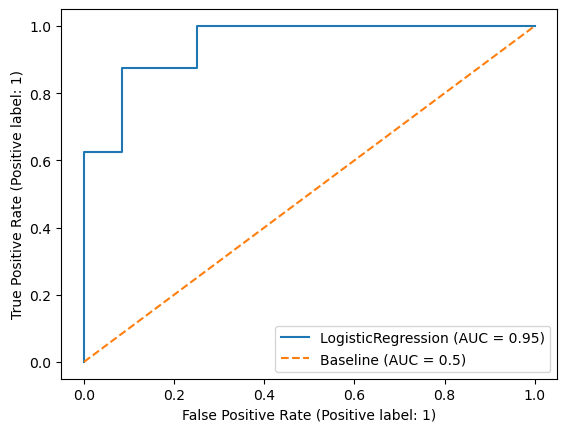

In [12]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [13]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 1.0
Testing AUC: 0.9479166666666667


# Clasificación multiclase

- Hasta ahora hemos estudiado clasificadores binarios: solo son capaces de distinguir entre dos clases.
- Es posible extender algoritmos binarios para poder identificar múltiples clases
- Estrategias:
    - Uno contra Todos (One versus All/One versus the Rest) (OvA/OvR)
    - Uno contra Uno (One versus One) (OvO)

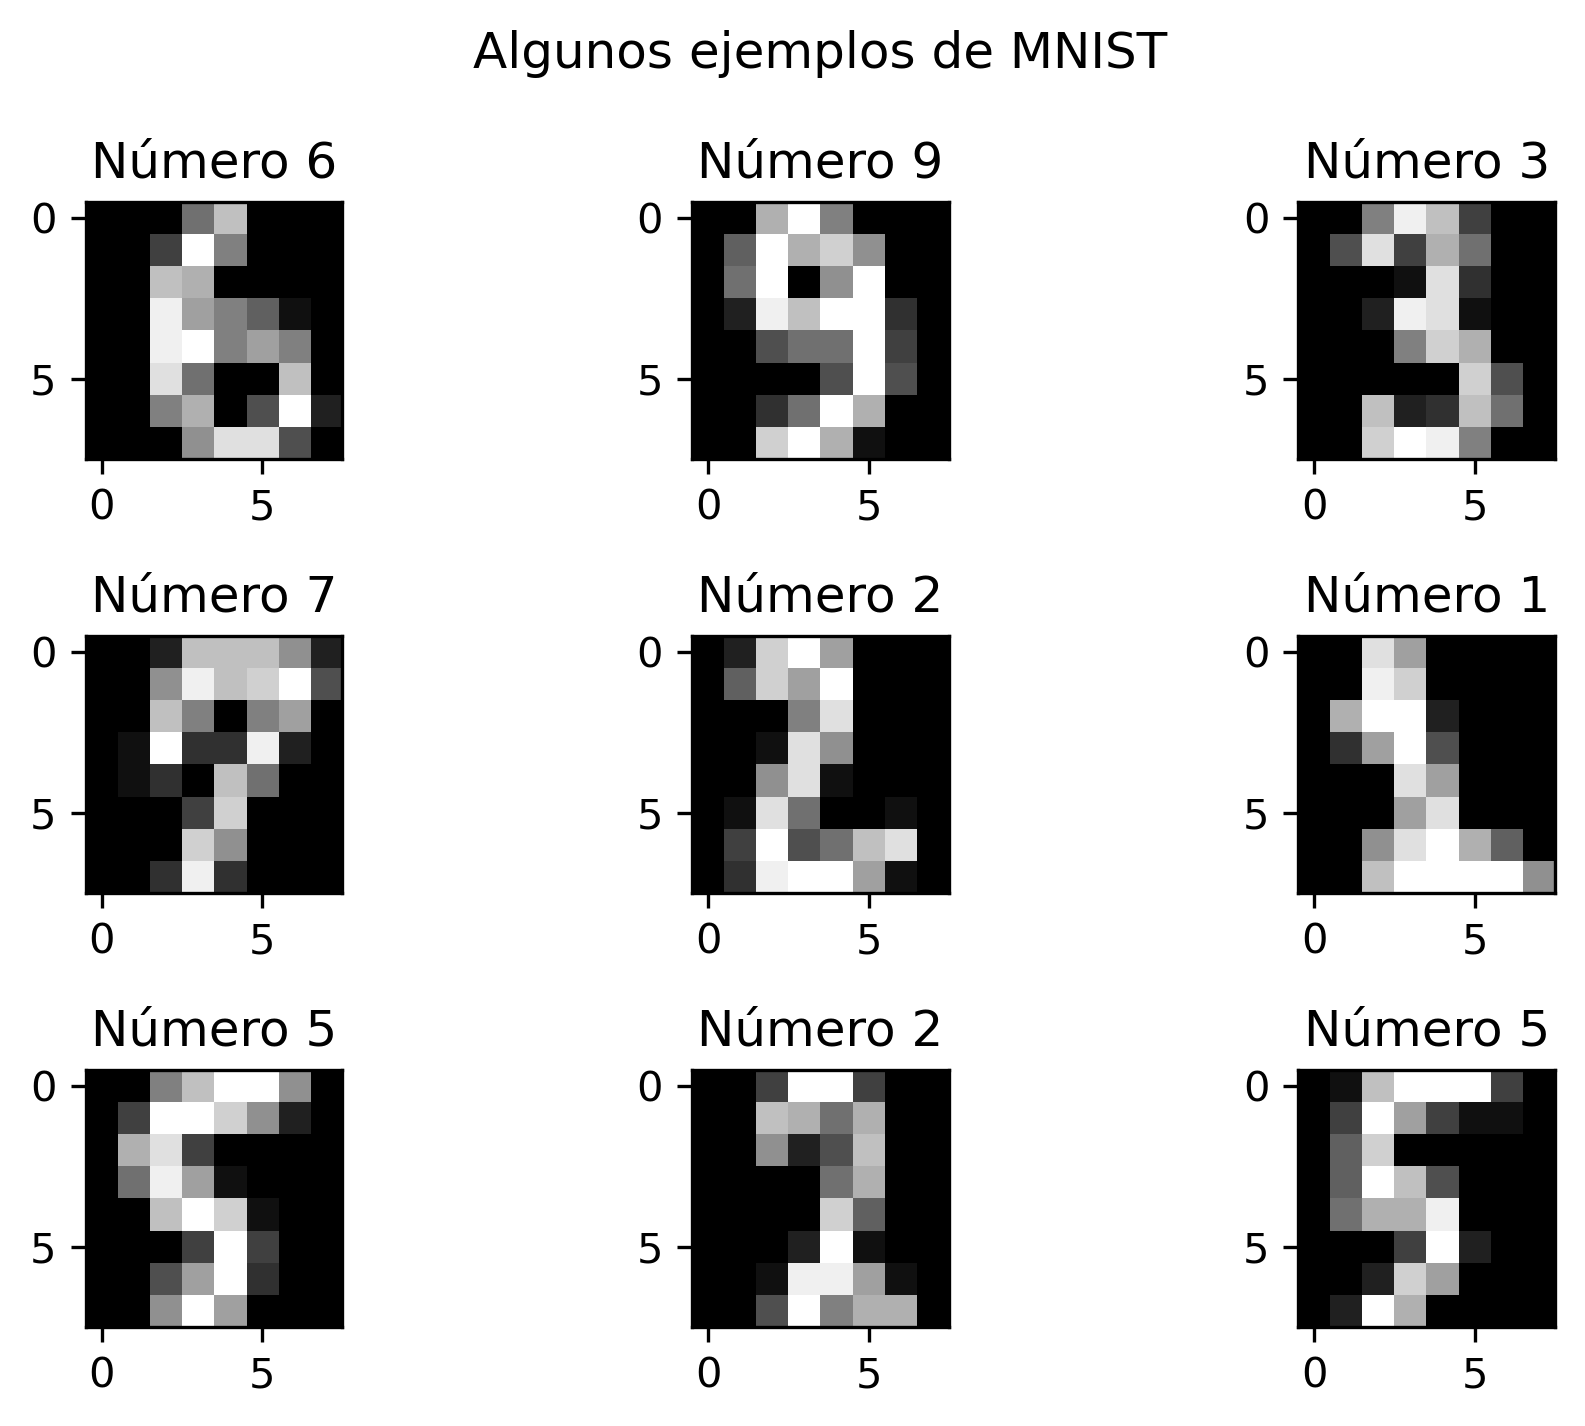

In [14]:
# Usando dataset MNIST para clasificación multiclase
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data # Ojo, en scikit learn, ya vienen los datos en formato fila!!
y = digits.target


# Ejemplos de datos
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

fig = plt.figure(dpi=300)
fig.suptitle('Algunos ejemplos de MNIST')

# Acá se grafican algunos ejemplos de imágenes de dígitos en nuestro dataset
ax = []
rand_numbers = np.random.choice(len(y), 9, replace=False)
for i in range(0,9):
    ax.append(fig.add_subplot(3,3,i+1))
    ax[i].imshow(X[rand_numbers[i]].reshape(8,8), cmap='gray')
    ax[i].title.set_text(f'Número {y[rand_numbers[i]]}')
fig.tight_layout()
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
log_reg = LogisticRegression(solver='liblinear',
                            multi_class='ovr')
log_reg.fit(X_train, y_train)

print('Accuracy test: ', log_reg.score(X_test,y_test))
print('Valores reales', y_test)
print('Predicciones:',log_reg.predict(X_test))

Accuracy test:  0.9611111111111111
Valores reales [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Predicciones: [6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 

Valor real 4
Predicción [4]


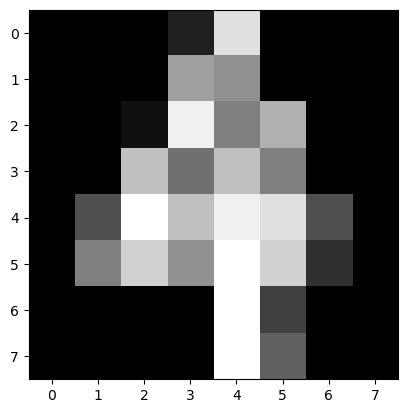

In [17]:
import matplotlib.pyplot as plt
# Ejemplos de predicciones
i = 20
# i = 11 # Error de predicción

image = X_test[i].reshape(8,8)
plt.imshow(image,cmap='gray')
print('Valor real', y_test[i])
print('Predicción', log_reg.predict(X_test[i].reshape(1,-1)))

# Actividad 6

A partir del dataset de supervivencia del titanic, disponible [aquí](data/titanic.csv)
- Utilice los algoritmos de clasificación aprendidos para predecir la supervivencia de los pasajeros.
- Obtenga y compare la curva ROC para cada clasificador utilizado.